# Введение в искусственные нейронные сети
# Урок 2. Keras

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.datasets import fashion_mnist  # набор для работы
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report


(train_imagef, train_labelf),(test_imagef, test_labelf) = fashion_mnist.load_data()

# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [2]:
n=1
train_imagef[n,:,:].shape

(28, 28)

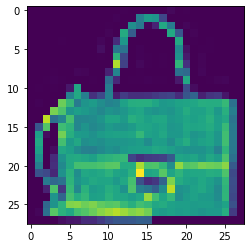

8


In [3]:
n = 2005
plt.imshow(train_imagef[n,:,:])
plt.show()
print(train_labelf[n])

**Создание модели**

Размер набора входных данных для обучения 

In [2]:
train_images.shape,test_images.shape

((60000, 784), (10000, 784))

In [3]:
# Build the model.
model_params = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model_params.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [4]:
model_params.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 110)               14190     
                                                                 
 dense_2 (Dense)             (None, 100)               11100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 126,780
Trainable params: 126,780
Non-trainable params: 0
_________________________________________________________________


Превратим выходы в векторые (OHE в keras - from keras.utils import to_categorical)

In [5]:
train_labelf[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)

In [7]:
y_t[:3,:]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
train_labelf[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

Посмотрим на реакции модели до обучения - уже можно:)

In [9]:
y_pred = model_params.predict(test_images[:5,:])

In [10]:
y_pred[0,:]

array([0.12386731, 0.03098087, 0.07742542, 0.13387126, 0.07581783,
       0.05244214, 0.07918812, 0.28140706, 0.05479141, 0.09020863],
      dtype=float32)

In [11]:
y_class = np.argmax(y_pred, axis=1)
print(y_class) # [7, 2, 1, 0, 4]

[7 8 3 3 7]


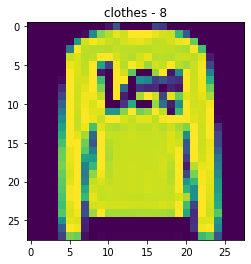

In [12]:
n = 1
plt.imshow(test_imagef[n,:,:])
plt.title('clothes - '+str(y_class[n]))
plt.show()

In [13]:
df_result = pd.DataFrame()

In [14]:
number_of_neurons = [[128, 110, 100, 10], [128, 50, 25, 10], [256, 220, 200, 10],
                     [512, 256, 256, 10], [128, 110, 100, 10], [64, 52, 24, 10]]
for neurons in number_of_neurons:
  # Build the model.
  model_params = Sequential([
    Dense(neurons[0], activation='tanh', input_shape=(784,)),
    Dense(neurons[1], activation='tanh'), # Скрытый слой с активацией tanh
    Dense(neurons[2], activation='tanh'), # Скрытый слой с активацией tanh
    Dense(neurons[3], activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

  # Compile the model.
  model_params.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )

  # Train the model.
  hh_train = model_params.fit(    
    train_images[:,:],
    y_t[:,:],
    epochs=5,
    batch_size=32, validation_split=0.2
  )

  # Evaluate the model.
  hh_test = model_params.evaluate( 
    test_images,
    y_tt
  )
  dict_result = dict()
  dict_result['neurons'] = (neurons[0], )
  dict_result['neurons_1'] = (neurons[1], )
  dict_result['neurons_2'] = (neurons[2], )
  dict_result['train_accuracy'] = hh_train.history['accuracy'][-1]
  dict_result['test_accuracy'] = hh_test[-1]
  df_result = pd.concat([df_result, pd.DataFrame(dict_result).reset_index()], ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5034 - accuracy: 0.8176 - val_loss: 0.4218 - val_accuracy: 0.8438
Epoch 2/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4005 - accuracy: 0.8534 - val_loss: 0.3852 - val_accuracy: 0.8623
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3708 - accuracy: 0.8641 - val_loss: 0.3779 - val_accuracy: 0.8648
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3533 - accuracy: 0.8703 - val_loss: 0.3874 - val_accuracy: 0.8572
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4066 - accuracy: 0.8507
Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5434 - accuracy: 0.8154 - val_loss: 0.4336 - val_accuracy: 0.8460
Epoch 2/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4180 - accuracy: 0.8502 - val_loss: 0.4333 - val_accuracy: 0.8467
Epoch 3/5
1500/1500 [====================

In [15]:
df_result

,index,neurons,neurons_1,neurons_2,train_accuracy,test_accuracy
0,0,128,110,100,0.874792,0.8507
1,0,128,50,25,0.871687,0.8525
2,0,256,220,200,0.871625,0.8628
3,0,512,256,256,0.867125,0.8482
4,0,128,110,100,0.872813,0.8517
5,0,64,52,24,0.872646,0.8521


In [16]:
model_2_layer = Sequential([
    Dense(512, activation='tanh', input_shape=(784,)),
    Dense(256, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(128, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

model_3_layer = Sequential([
    Dense(512, activation='tanh', input_shape=(784,)),
    Dense(226, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(170, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(56, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])


model_5_layer = Sequential([
    Dense(512, activation='tanh', input_shape=(784,)),
    Dense(230, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(130, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(90, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(50, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(25, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

model_10_layer = Sequential([
    Dense(512, activation='tanh', input_shape=(784,)),
    Dense(165, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(125, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(120, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(115, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(100, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(85, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(70, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(40, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(25, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(20, activation='tanh'), # Скрытый слой с активацией tanh
    Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
  ])

In [17]:
model_2_layer.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 128)               32896     
                                                                 
 dense_31 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


In [18]:
model_3_layer.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 dense_33 (Dense)            (None, 226)               115938    
                                                                 
 dense_34 (Dense)            (None, 170)               38590     
                                                                 
 dense_35 (Dense)            (None, 56)                9576      
                                                                 
 dense_36 (Dense)            (None, 10)                570       
                                                                 
Total params: 566,594
Trainable params: 566,594
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_5_layer.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 512)               401920    
                                                                 
 dense_38 (Dense)            (None, 230)               117990    
                                                                 
 dense_39 (Dense)            (None, 130)               30030     
                                                                 
 dense_40 (Dense)            (None, 90)                11790     
                                                                 
 dense_41 (Dense)            (None, 50)                4550      
                                                                 
 dense_42 (Dense)            (None, 25)                1275      
                                                                 
 dense_43 (Dense)            (None, 10)               

In [20]:
model_10_layer.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 165)               84645     
                                                                 
 dense_46 (Dense)            (None, 125)               20750     
                                                                 
 dense_47 (Dense)            (None, 120)               15120     
                                                                 
 dense_48 (Dense)            (None, 115)               13915     
                                                                 
 dense_49 (Dense)            (None, 100)               11600     
                                                                 
 dense_50 (Dense)            (None, 85)              

In [21]:
df_result_model = pd.DataFrame()

In [22]:
model_list = [model_2_layer, model_3_layer, model_5_layer, model_10_layer]
model_name = ['2_layer', '3_layer', '5_layer', '10_layer']
count = 0
for model in model_list:
  # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    hh_train = model.fit(    
      train_images[:,:],
      y_t[:,:],
      epochs=5,
      batch_size=32, validation_split=0.2
    )

    # Evaluate the model.
    hh_test = model.evaluate( 
      test_images,
      y_tt
    )
    dict_result_model = dict()
    dict_result_model['model'] = model_name[count]
    count += 1
    dict_result_model['train_accuracy'] = hh_train.history['accuracy'][-1]
    dict_result_model['test_accuracy'] = hh_test[-1]
    df_result_model = pd.concat([df_result_model, pd.DataFrame(dict_result_model, index=range(count,count+1)).reset_index()], ignore_index=True)

Epoch 1/5
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5138 - accuracy: 0.8125 - val_loss: 0.4318 - val_accuracy: 0.8435
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4175 - accuracy: 0.8466 - val_loss: 0.4178 - val_accuracy: 0.8460
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3878 - accuracy: 0.8569 - val_loss: 0.3912 - val_accuracy: 0.8591
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3747 - accuracy: 0.8622 - val_loss: 0.4398 - val_accuracy: 0.8302
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8528
Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5340 - accuracy: 0.8070 - val_loss: 0.4300 - val_accuracy: 0.8438
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4310 - accuracy: 0.8432 - val_loss: 0.4294 - val_accuracy: 0.8425
Epoch 3/5
1500/1500 [======================

In [23]:
df_result_model

,index,model,train_accuracy,test_accuracy
0,1,2_layer,0.866063,0.8528
1,2,3_layer,0.862271,0.8547
2,3,5_layer,0.855812,0.8332
3,4,10_layer,0.833000,0.8346


In [25]:
df_result_optimize = pd.DataFrame()

313/313 [==============================] - 1s 4ms/step - loss: 0.4070 - accuracy: 0.8507


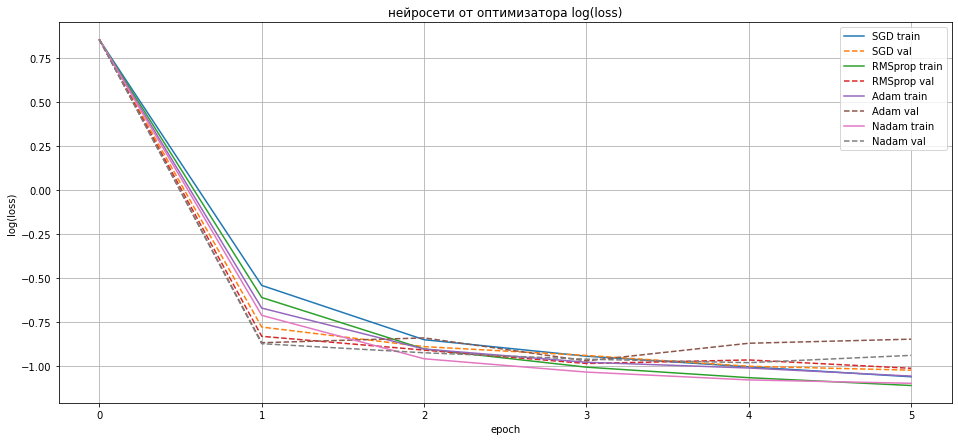

In [26]:
# создаем модель model
model_optimize = Sequential([
          Dense(256, activation='tanh', input_shape=(784,)),
          Dense(220, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(200, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
        ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model_optimize.save_weights('model_optimize.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 5
# вектор для вывода результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
          Dense(256, activation='tanh', input_shape=(784,)),
          Dense(220, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(200, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
          ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model_optimize.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
  hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  
   #  вычисляем ошибку для modeli после обучения
  hh_test = modeli.evaluate( 
      test_images,
      y_tt
    )
  dict_result_optimize = dict()
  dict_result_optimize['optimizer'] = i_optim
  dict_result_optimize['train_accuracy'] = hh.history['accuracy'][-1]
  dict_result_optimize['test_accuracy'] = hh_test[-1]
  df_result_optimize = pd.concat([df_result_optimize, pd.DataFrame(dict_result_optimize, index=range(1)).reset_index()], ignore_index=True)
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


In [27]:
df_result_optimize

,index,optimizer,train_accuracy,test_accuracy
0,0,SGD,0.875646,0.8599
1,0,RMSProp,0.878229,0.8670
2,0,adam,0.871333,0.8399
3,0,NAdam,0.874979,0.8507


In [28]:
best_model = Sequential([
          Dense(256, activation='tanh', input_shape=(784,)),
          Dense(220, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(200, activation='tanh'), # Скрытый слой с активацией tanh
          Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
          ])

best_model.compile(
      optimizer='RMSProp',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # проводим обучение модели 
hh_best = best_model.fit(
                train_images,
                to_categorical(train_labelf),
                epochs=epochs,
                batch_size=32, validation_split=0.2, verbose = 0
                )
  
   #  вычисляем ошибку для modeli после обучения
hh_test_best = best_model.evaluate( 
      test_images,
      y_tt
    )

prediction = best_model.predict(test_images)

313/313 [==============================] - 1s 4ms/step - loss: 0.3877 - accuracy: 0.8640


In [29]:
y_test_arg = np.argmax(prediction, axis=1)

In [30]:
confusion_matrix(test_labelf, y_test_arg, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([[793,   0,  24,  19,   4,   2, 150,   0,   7,   1],
       [  8, 959,   2,  23,   4,   0,   4,   0,   0,   0],
       [ 10,   0, 855,  11,  78,   1,  43,   0,   2,   0],
       [ 35,   7,   9, 884,  26,   1,  34,   0,   4,   0],
       [  1,   1, 124,  41, 785,   0,  44,   0,   4,   0],
       [  0,   0,   0,   1,   0, 939,   0,  46,   1,  13],
       [110,   0, 148,  23, 122,   0, 587,   0,  10,   0],
       [  0,   0,   0,   0,   0,  27,   0, 963,   0,  10],
       [  0,   0,   8,  10,   3,   5,  11,   5, 958,   0],
       [  0,   0,   0,   1,   0,  14,   0,  68,   0, 917]])

In [31]:
print(classification_report(test_labelf, y_test_arg, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.99      0.96      0.98      1000
           2       0.73      0.85      0.79      1000
           3       0.87      0.88      0.88      1000
           4       0.77      0.79      0.78      1000
           5       0.95      0.94      0.94      1000
           6       0.67      0.59      0.63      1000
           7       0.89      0.96      0.93      1000
           8       0.97      0.96      0.96      1000
           9       0.97      0.92      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



Выводы:
1. Наилучший результат показала нейронная сеть, с 256	нейронами во входном слое, 220 нейронами в первом скрытом слое,	200 нейронами во втором скрытом слое и 10 нейронами в выходном слое. Наблюдается следующая закономерность: чем больше нейронов в сети, тем лучший результат показывает модель, если она не переобучена.
2. При увеличении количества скрытых слоёв модель показывала более плохие результаты.
3. Среди оптимизаторов наиболее хороший результат показала модель с оптимизацией RMSProp